In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df=pd.read_csv('Google_Stock_Price_Train.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [40]:
data= df.iloc[:, 1:2].values

In [41]:
data

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

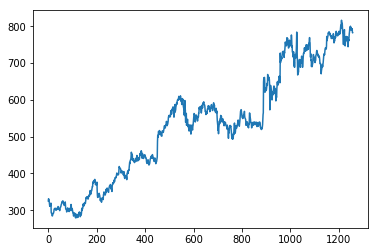

In [46]:
plt.plot(data)

In [77]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_scaled = sc.fit_transform(data)

In [78]:
training_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [79]:
training_size=int(len(data)*0.70)
test_size=len(data)-training_size
training_data,test_data=data[0:training_size,:],data[training_size:len(data),:1]

In [80]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [81]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(training_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [82]:
print(X_train.shape), print(y_train.shape)

(779, 100)
(779,)


(None, None)

In [83]:
print(X_test.shape), print(ytest.shape)

(277, 100)
(277,)


(None, None)

In [84]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [86]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(60,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')

In [87]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 11s 356ms/step - loss: 234112.2701 - val_loss: 549117.4375
Epoch 2/100
13/13 [==============================] - 3s 232ms/step - loss: 227756.9855 - val_loss: 545277.9375
Epoch 3/100
13/13 [==============================] - 3s 254ms/step - loss: 227831.1551 - val_loss: 542352.9375
Epoch 4/100
13/13 [==============================] - 3s 261ms/step - loss: 221262.6551 - val_loss: 540515.3750
Epoch 5/100
13/13 [==============================] - 3s 246ms/step - loss: 221928.5569 - val_loss: 539086.8125
Epoch 6/100
13/13 [==============================] - 3s 240ms/step - loss: 222271.3984 - val_loss: 537616.3750
Epoch 7/100
13/13 [==============================] - 3s 253ms/step - loss: 218333.7935 - val_loss: 536360.2500
Epoch 8/100
13/13 [==============================] - 3s 248ms/step - loss: 220651.7366 - val_loss: 535203.6250
Epoch 9/100
13/13 [==============================] - 3s 240ms/step - loss: 220223.3460 - val_loss: 534087.1875


13/13 [==============================] - 3s 234ms/step - loss: 187341.1362 - val_loss: 480803.5625
Epoch 66/100
13/13 [==============================] - 3s 235ms/step - loss: 182966.7768 - val_loss: 479912.4688
Epoch 67/100
13/13 [==============================] - 3s 239ms/step - loss: 185955.6730 - val_loss: 479020.0312
Epoch 68/100
13/13 [==============================] - 3s 248ms/step - loss: 182237.2254 - val_loss: 478135.2188
Epoch 69/100
13/13 [==============================] - 3s 240ms/step - loss: 183511.0725 - val_loss: 477247.7500
Epoch 70/100
13/13 [==============================] - 3s 234ms/step - loss: 183751.0804 - val_loss: 476362.0938
Epoch 71/100
13/13 [==============================] - 3s 234ms/step - loss: 182740.5960 - val_loss: 475480.5312
Epoch 72/100
13/13 [==============================] - 3s 239ms/step - loss: 182153.9185 - val_loss: 474600.7500
Epoch 73/100
13/13 [==============================] - 3s 235ms/step - loss: 180192.5647 - val_loss: 473721.9688
Epoch

In [90]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [92]:
##Transformback to original form
train_predict=sc.inverse_transform(train_predict)
test_predict=sc.inverse_transform(test_predict)

In [93]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

39729.22219157214

In [94]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

39457.620304002325

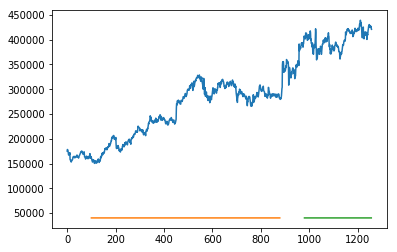

In [115]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict
# plot baseline and predictions
plt.plot(sc.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [116]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 37)

In [117]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [118]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=37
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[74.26732]
38
[74.26732]
39
[74.26732]
40
[74.26732]
41
[74.26732]
42
[74.26732]
43
[74.26732]
44
[74.26732]
45
[74.26732]
46
[74.26732]
47
[74.26732]
48
[74.26732]
49
[74.26732]
50
[74.26732]
51
[74.26732]
52
[74.26732]
53
[74.26732]
54
[74.26732]
55
[74.26732]
56
[74.26732]
57
[74.26732]
58
[74.26732]
59
[74.26732]
60
[74.26732]
61
[74.26732]
62
[74.26732]
63
[74.26732]
64
[74.26732]
65
[74.26732]
66
[74.26732]
67
[[74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872558594], [74.26731872

In [119]:
day_new=np.arange(1,38)
day_pred=np.arange(38,78)

In [110]:
len(data)

1258

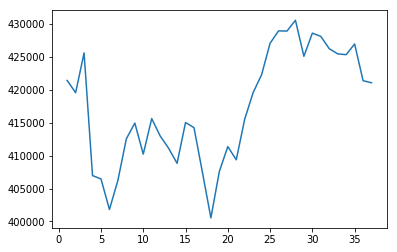

In [122]:
plt.plot(day_new,sc.inverse_transform(data[1221:]))